# Import Statements

Load in relevant Python packages to create Figures 6-8 in "Characterizing the Multisectoral Impacts of Future Global Hydrologic Variability" by Birnbaum et al. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load Mapping Data

Load in shapefiles using Geopandas for the basins and regions in GCAM. These are used to make the maps in Figures 6-8.

In [2]:
#load in shapefile of GCAM basins
gcam_basins = gpd.read_file('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/gswp3w5e5data_19012019/gcam_basins/gcam_basins.shp')
bc_map = pd.read_csv('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/gswp3w5e5data_19012019/basin_to_country_mapping.csv')
#clean up shapefile
gcam_basins = gcam_basins.rename(columns={'sbRgnAl':'GCAM_basin_ID'}) #rename columns
bc_map = bc_map.rename(columns={'GLU_name':'basin'}) #rename columns in basin-country mapping
gcam_basins = gcam_basins.merge(bc_map,on=['GCAM_basin_ID']) #merge basins with basin-country mapping

#load in shapefile of GCAM regions
gcam_regions = gpd.read_file('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/gswp3w5e5data_19012019/gcam_regions/gcam_regions.shp')

#load in color palette used across all plots/figures
cpal = sns.color_palette('Paired',11)

# Load in all GCAM query data used to produce figures

Begin by loading in water withdrawals (total, groundwater, surface) by basin, max available runoff by basin, water price by basin, water withdrawals for irrigation by basin, primary energy consumption by region, and ag production by basin.
All of this data has previously been saved as pickles or CSV files.

In [3]:
#total water withdrawals
ww = pd.read_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww')
#groundwater withdrawals
ww_gw = pd.read_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww_gw')
#surface water withdrawals
ww_sw = pd.read_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww_sw')
#max available runoff
mr = pd.read_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/mr')
#water price
wp = pd.read_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/wp')
#water withdrawals for irrigation
ww_irrig = pd.read_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww_irrig')
#primary energy consumption
ep = pd.read_csv('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/primary_energy.csv')
#ag production
agprod = pd.read_csv('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/ag_production_allbasin_sum.csv')
#cropland allocation for Indus basin
la_indus = pd.read_csv('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/land_alloc_indus.csv')

Next, "clean up" these datasets by limiting to years 2015-2100 and only crops of interest (when applicable)  

In [4]:
#list of crops to include for crop production
crop_list = ['CornC4', 'FiberCrop', 'FodderGrass', 'FodderHerbC4', 'FodderHerb',
       'FruitsTree', 'Fruits', 'Legumes', 'MiscCropTree', 'MiscCrop',
       'NutsSeedsTree', 'NutsSeeds', 'OilCropTree', 'OilCrop',
       'OtherGrainC4', 'OtherGrain', 'Rice', 'RootTuber', 'Soybean',
       'SugarCropC4', 'SugarCrop', 'Vegetables', 'Wheat'] #took out biomassGrass and biomassTree

#list of crops to include for land allocation
la_croplist = ['CornC4', 'FiberCrop', 'FodderGrass', 'FodderHerb',
       'FruitsTree', 'Fruits', 'Legumes', 'MiscCropTree',
       'MiscCrop', 'NutsSeedsTree', 'NutsSeeds', 'OilCropTree', 'OilCrop',
       'OilPalmTree', 'OtherGrainC4', 'OtherGrain', 'Rice',
       'RootTuber', 'Soybean',
       'SugarCropC4', 'Vegetables', 'Wheat', 'FodderHerbC4', 'SugarCrop']
#removed  'Grassland', 'OtherArableLand','Pasture','ProtectedGrassland','Protected Shrubland',
#'ProtectedUnmanagedPasture','RockIceDesert','Shrubland','UnmanagedPasture',Tundra','UrbanLand',
#'biomassGrass','Forest','ProtectedUnmanagedForest','UnmanagedForest','biomassTree'

In [5]:
#set water withdrawals for irrigation to crops of interest and year >= 2015
ww_irrig = ww_irrig[(ww_irrig.crop.isin(crop_list)) & (ww_irrig.year>=2015)]

#set year>= 2015 for runoff, total water withdrawals, and surface water withdrawals 
mr = mr[(mr.year>=2015)]
ww = ww[(ww.year>=2015)]
sw = ww_sw[(ww_sw.year>=2015)]

#create variables for global water withdrawals, primary energy, and ag production
ww_glob = ww.groupby(['scenario','Units','year'])['value'].sum().reset_index() #global water withdrawals
ep_glob = ep.groupby(['scenario','Units','year'])['value'].sum().reset_index() #primary energy
ep_glob = ep_glob[ep_glob.year>=2015] #limit to 2015 and later
agprod_glob = agprod.groupby(['scenario','Units','year'])['value'].sum().reset_index() #ag production
agprod_glob = agprod_glob[agprod_glob.year>=2015] #limit to 2015 and later

# Figure 6: Global and Regional Impacts on Energy, Water, and Agriculture

Figure 6A shows time series from 2015-2100 of coefficient of variation in each of primary energy consumption, total water withdrawals, and crop production (globally). 

In [6]:
#CV for global energy consumption
cv_ep_glob = ep_glob.groupby(['year']).std()/ep_glob.groupby(['year']).mean()
cv_ep_glob = cv_ep_glob.reset_index()

#CV for global total water withdrawals
cv_ww_glob = ww_glob.groupby(['year']).std()/ww_glob.groupby(['year']).mean()
cv_ww_glob = cv_ww_glob.reset_index()

#CV for global total ag production
cv_agprod_glob = agprod_glob.groupby(['year']).std()/agprod_glob.groupby(['year']).mean()
cv_agprod_glob = cv_agprod_glob.reset_index()

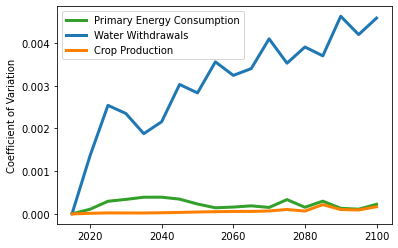

In [7]:
fig = plt.figure() #create figure
sns.lineplot(data=cv_ep_glob,x='year',y='value',label='Primary Energy Consumption',color=cpal[3],lw=3)
sns.lineplot(data=cv_ww_glob,x='year',y='value',label='Water Withdrawals',color=cpal[1],lw=3)
sns.lineplot(data=cv_agprod_glob,x='year',y='value',label='Crop Production',color=cpal[7],lw=3)
plt.xlabel('')
plt.ylabel('Coefficient of Variation')
plt.show()

Figure 6B shows map of basin variability in 2100 for crop production

In [8]:
#create variable of total water withdrawals in 2100
ww_2100 = ww.groupby(['scenario','Units','basin','year'])['value'].sum().reset_index()
ww_2100 = ww_2100[ww_2100.year==2100]

#calculate variability for each basin
cv_ww_2100 = ww_2100.groupby(['basin','year']).std()/ww_2100.groupby(['basin','year']).mean()
cv_ww_2100 = cv_ww_2100.reset_index()
cv_ww_2100 = gcam_basins.merge(cv_ww_2100,on=['basin'])

posx and posy should be finite values


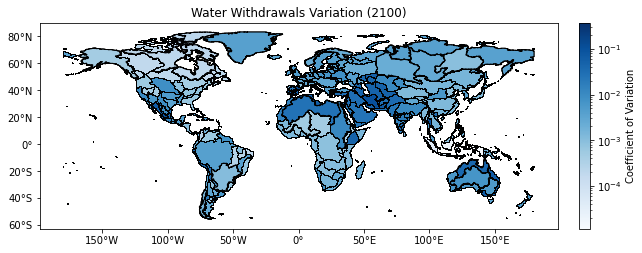

In [9]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

gcam_basins.plot(edgecolor='k',ax=ax,facecolor='None')
cv_ww_2100.plot(ax=ax,cax=cax,column='value',cmap='Blues',edgecolor='k',
                norm=mcolors.LogNorm(vmin=cv_ww_2100.value.min(), vmax=cv_ww_2100.value.max()),
                   legend=True,legend_kwds={'orientation':'vertical','label':'Coefficient of Variation'})
ax.set_title('Water Withdrawals Variation (2100)')


# #making latitude/longitude text labels smaller
 #label maps with lat/lon coordinates
axlbl = fig.axes[0] #https://gist.github.com/sebbacon/60ceec549f1d461af4543ccc5024c095?short_path=839cef5
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params()

cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])

plt.show()

Figure 6C shows map of regional variability in 2100 for primary energy consumption

In [10]:
#first create ep_2100 variable that is regional energy consumption in 2100 (all sources summed)
ep_2100 = ep.groupby(['scenario','Units','region','year'])['value'].sum().reset_index()
ep_2100 = ep_2100[ep_2100.year==2100]

#calculate CV in 2100 for each region
cv_ep_2100 = ep_2100.groupby(['region','year']).std()/ep_2100.groupby(['region','year']).mean()
cv_ep_2100 = cv_ep_2100.reset_index()

#rename EU_12 and EU_15 regions to match map shapefile
cv_ep_2100.loc[cv_ep_2100.region=='EU-12','region'] = 'EU_12'
cv_ep_2100.loc[cv_ep_2100.region=='EU-15','region'] = 'EU_15'

#merge with gcam_regions shapefile for mapping
cv_ep_2100 = gcam_regions.merge(cv_ep_2100,on=['region'])

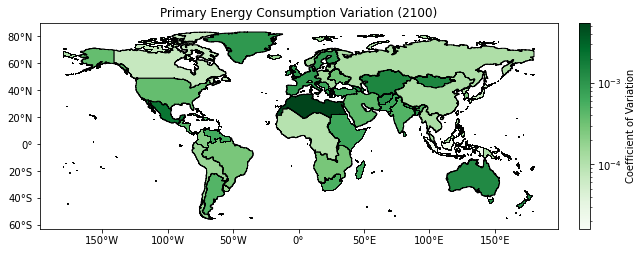

In [11]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

cv_ep_2100.plot(ax=ax,cax=cax,column='value',cmap='Greens',edgecolor='k',
                norm=mcolors.LogNorm(vmin=cv_ep_2100.value.min(), vmax=cv_ep_2100.value.max()),
               legend=True,legend_kwds={'orientation':'vertical',
                                       'label':'Coefficient of Variation'})
ax.set_title('Primary Energy Consumption Variation (2100)')

# #making latitude/longitude text labels smaller
 #label maps with lat/lon coordinates
axlbl = fig.axes[0] #https://gist.github.com/sebbacon/60ceec549f1d461af4543ccc5024c095?short_path=839cef5
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params()

cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])

plt.show()

Figure 6D shows map of basin variability in 2100 for crop production

In [12]:
#create variable of basin-level crop production in 2100
agprod_2100 = agprod.groupby(['scenario','Units','basin','year'])['value'].sum().reset_index()
agprod_2100 = agprod_2100[agprod_2100.year==2100]

#calculate CV for each basin
cv_agprod_2100 = agprod_2100.groupby(['basin','year']).std()/agprod_2100.groupby(['basin','year']).mean()
cv_agprod_2100 = cv_agprod_2100.reset_index()
cv_agprod_2100 = gcam_basins.merge(cv_agprod_2100,on=['basin'])

posx and posy should be finite values


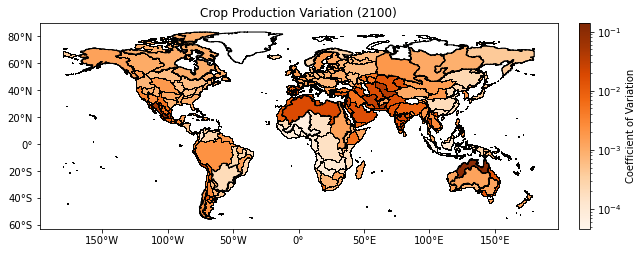

In [13]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.2)

gcam_basins.plot(edgecolor='k',ax=ax,facecolor='None')

cv_agprod_2100.plot(ax=ax,cax=cax,column='value',cmap='Oranges',edgecolor='k',
                    norm=mcolors.LogNorm(vmin=cv_agprod_2100.value.min(), vmax=cv_agprod_2100.value.max()),
                   legend=True,legend_kwds={'orientation':'vertical','label':'Coefficient of Variation'})
ax.set_title('Crop Production Variation (2100)')

# #making latitude/longitude text labels smaller
 #label maps with lat/lon coordinates
axlbl = fig.axes[0] #https://gist.github.com/sebbacon/60ceec549f1d461af4543ccc5024c095?short_path=839cef5
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params()

cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])

plt.show()

# Figure 7: Basin-scale relative variability in 2100 for water withdrawals

Calculate coefficient of variations for relevant quantities

In [14]:
#CV for total water withdrawals (by basin)
cv_ww_basin = ww.groupby(['year','basin'])['value'].std()/ww.groupby(['year','basin'])['value'].mean()
cv_ww_basin = cv_ww_basin.reset_index()

#CV for runoff (by basin)
cv_mr_basin = mr.groupby(['year','basin'])['value'].std()/mr.groupby(['year','basin'])['value'].mean()
cv_mr_basin = cv_mr_basin.reset_index()

#CV for surface water withdrawals (by basin)
cv_sw_basin = sw.groupby(['year','basin'])['value'].std()/sw.groupby(['year','basin'])['value'].mean()
cv_sw_basin = cv_sw_basin.reset_index()
cv_sw_basin = cv_sw_basin.rename(columns={'value':'value_sw'})

#merge CV for total water withdrawals, runoff, and surface water withdrawals
cv_basin = cv_ww_basin.merge(cv_mr_basin,on=['year','basin'],suffixes=['_ww','_mr'])
cv_basin = cv_basin.merge(cv_sw_basin,on=['year','basin'])
cv_basin = cv_basin.filter(['year','basin','value_ww','value_mr','value_sw']) #filter to columns of interest

#create relative variability ratios, defined as CV quantity divided by CV runoff
cv_basin['ww_mr'] = cv_basin['value_ww']/cv_basin['value_mr'] #create column for ratio of total water withdrawals to runoff
cv_basin['sw_mr'] = cv_basin['value_sw']/cv_basin['value_mr'] #create column for ratio of surface water withdrawals to runoff


Figure 7A is map of CV total water withdrawals divided by CV runoff in 2100

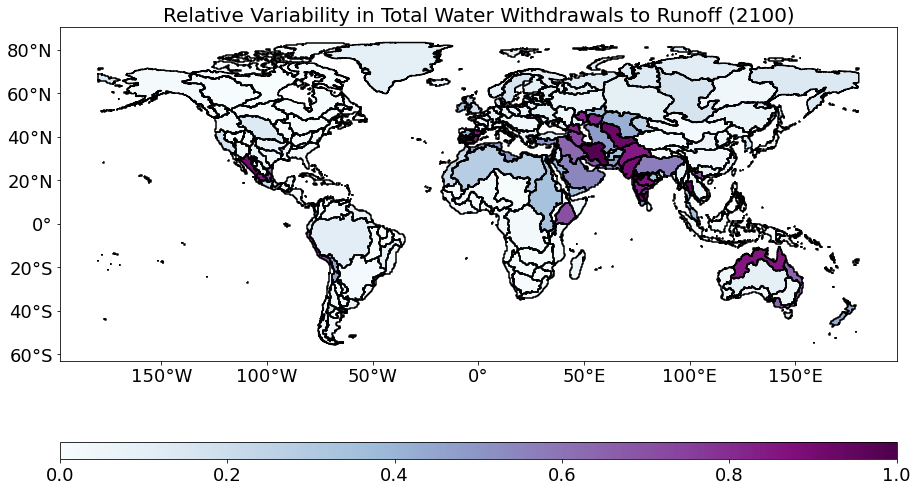

In [15]:
fig,(ax0) = plt.subplots(1,1,figsize=(15,10))

plot_df = cv_basin[cv_basin.year==2100] #limit to year 2100
plot_df = gcam_basins.merge(plot_df,on=['basin'])
plot_df.boundary.plot(ax=ax0,edgecolor='k')
plot_df.plot(column='ww_mr',ax=ax0,vmin=0,vmax=1,cmap='BuPu',legend=True,
            legend_kwds={'orientation':'horizontal','aspect':50})
             
# #making latitude/longitude text labels smaller
axlbl = fig.axes[0]
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params(labelsize=14)
 #label maps with lat/lon coordinates
cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])
cb_ax = ticksizes.axes[0]
cb_ax.tick_params(labelsize=18)
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=18)

ax0.set_title('Relative Variability in Total Water Withdrawals to Runoff (2100)',fontsize=20)
plt.show()

Figure 7B is map of CV surface water withdrawals divided by CV runoff in 2100

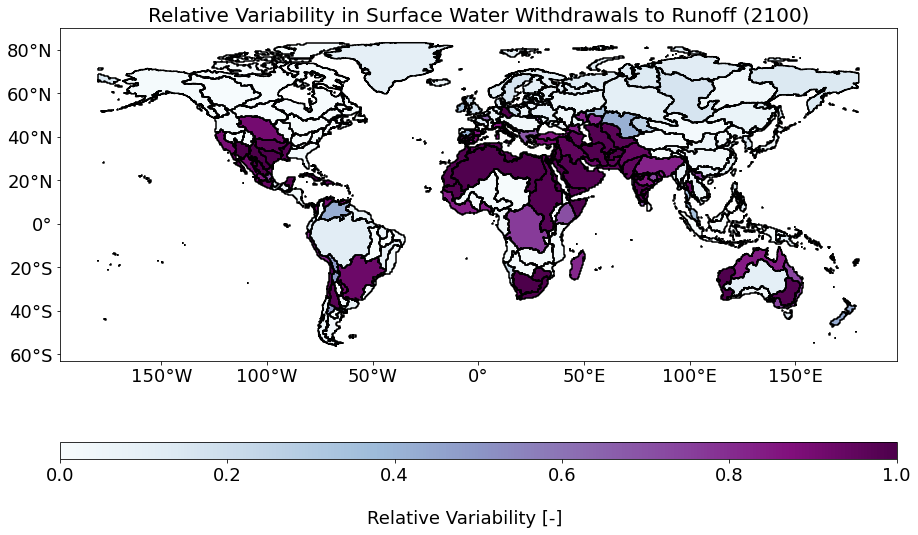

In [16]:
fig,(ax0) = plt.subplots(1,1,figsize=(15,10))

plot_df = cv_basin[cv_basin.year==2100] #limit to year 2100
plot_df = gcam_basins.merge(plot_df,on=['basin'])
plot_df.boundary.plot(ax=ax0,edgecolor='k')
plot_df.plot(column='sw_mr',ax=ax0,vmin=0,vmax=1,cmap='BuPu',legend=True,
            legend_kwds={'orientation':'horizontal','aspect':50})
             
# #making latitude/longitude text labels smaller
axlbl = fig.axes[0]
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params(labelsize=14)
 #label maps with lat/lon coordinates
cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])
cb_ax = ticksizes.axes[0]
cb_ax.tick_params(labelsize=18)
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=18)
fig.text(0.5,0.125,'Relative Variability [-]',fontsize=18,ha='center')
ax0.set_title('Relative Variability in Surface Water Withdrawals to Runoff (2100)',fontsize=20)
plt.show()

Print out the 20 basins with the highest relative variability ratios for total water withdrawals/runoff

In [17]:
cv_basin[cv_basin.year==2100].sort_values(by='ww_mr',ascending=False).head(10)

,year,basin,value_ww,value_mr,value_sw,ww_mr,sw_mr
4044,2100,Iran,0.105648,0.108071,0.106585,0.977581,0.986249
4136,2100,SinaiP,0.379033,0.392994,0.350611,0.964476,0.892154
4039,2100,IndCstE,0.032456,0.033850,0.032456,0.958801,0.958801
3991,2100,ChaoPhrR,0.087929,0.092200,0.087929,0.953679,0.953679
4001,2100,DeadSea,0.138922,0.148536,0.138922,0.935279,0.935279
3957,2100,AmuDaryaR,0.049363,0.052900,0.051053,0.933147,0.965092
4148,2100,TaptiR,0.022109,0.023795,0.022109,0.929142,0.929142
4074,2100,MexCstNW,0.067041,0.074257,0.067037,0.902828,0.902774
4083,2100,NarmadaR,0.023606,0.026148,0.023606,0.902788,0.902788
3990,2100,CauveryR,0.048697,0.054087,0.052864,0.900341,0.977395


# Figure 8: Plots showing impacts of runoff variability for Indus Basin

Begin by defining variables for quantities of interest for Indus basin

In [18]:
ww_irrig_indus = ww_irrig[ww_irrig.basin=='IndusR'] #water withdrawals for irrigation
mr_indus = mr[(mr.basin=='IndusR')] #runoff
ww_sw_indus = ww_sw[(ww_sw.year>=2015) & (ww_sw.basin=='IndusR')] #surface water withdrawals
ww_indus = ww[(ww.year>=2015) & (ww.basin=='IndusR')] #total water withdrawals
wp_indus = wp[(wp.basin=='IndusR') & (wp.year>=2015)] #water price

# sum up irrigation water withdrawals across crop types
ww_irrig_indus_sum = ww_irrig_indus.groupby(['scenario','Units','year','basin'])['value'].sum().reset_index()

#clean up cropland allocation
la_indus = la_indus[la_indus.year>=2015] #limit to year>=2015
la_indus[['crop','basin','irr_type','fert_type']] = la_indus.landleaf.str.split('_',n=3,expand=True) 
la_indus = la_indus[(la_indus.crop.isin(la_croplist))] #limit to crops of interest
la_indus_sum = la_indus.groupby(['scenario','Units','year','irr_type'])['value'].sum().reset_index() #sum all crops
la_indus_irrig = la_indus_sum[la_indus_sum.irr_type=='IRR'] #sum irrigated crops
la_indus_rfd = la_indus_sum[la_indus_sum.irr_type=='RFD'] #sum rainfed crops

years = mr_indus.year.unique() #get years

Figure 8A is a time series 2015-2100 of relative variability in quantities of interest (surface water withdrawals, irrigated cropland, water price, water withdrawals for irrigation) to runoff for Indus basin

In [19]:
#calculate coefficient of variation for each quantity
cv_mr_indus = mr_indus.groupby(['year'])['value'].std()/mr_indus.groupby(['year'])['value'].mean() #runoff
cv_mr_indus = cv_mr_indus.reset_index()

cv_wp_indus = wp_indus.groupby(['year'])['value'].std()/wp_indus.groupby(['year'])['value'].mean() #water price
cv_wp_indus = cv_wp_indus.reset_index()

cv_sw_indus = ww_sw_indus.groupby(['year'])['value'].std()/ww_sw_indus.groupby(['year'])['value'].mean() #surface water withdrawals
cv_sw_indus = cv_sw_indus.reset_index()

cv_ww_irrig_indus = ww_irrig_indus_sum.groupby(['year'])['value'].std()/ww_irrig_indus_sum.groupby(['year'])['value'].mean() #irrigation water withdrawals
cv_ww_irrig_indus = cv_ww_irrig_indus.reset_index()

cv_la_irrig_indus = la_indus_irrig.groupby(['year'])['value'].std()/la_indus_irrig.groupby(['year'])['value'].mean() #irrigated cropland
cv_la_irrig_indus = cv_la_irrig_indus.reset_index()

#merge all CVs together
cv_indus1 = cv_wp_indus.merge(cv_sw_indus,on=['year'],suffixes=['_wp','_sw'])
cv_indus2 = cv_la_irrig_indus.merge(cv_ww_irrig_indus,on=['year'],suffixes=['_la_irrig','_ww_irrig'])
cv_indus = cv_indus1.merge(cv_indus2)
cv_indus = cv_indus.merge(cv_mr_indus,on=['year'])
cv_indus = cv_indus.rename(columns={'value':'value_mr'})
cv_indus = cv_indus[cv_indus.year>=2020] #limit to year 2020 and later

#get ratios of CV quantity to CV runoff
cv_indus_ratios = cv_indus.copy()
cv_indus_ratios['value_wp'] = cv_indus_ratios['value_wp']/cv_indus_ratios['value_mr']
cv_indus_ratios['value_ww_irrig'] = cv_indus_ratios['value_ww_irrig']/cv_indus_ratios['value_mr']
cv_indus_ratios['value_la_irrig'] = cv_indus_ratios['value_la_irrig']/cv_indus_ratios['value_mr']
cv_indus_ratios['value_sw'] = cv_indus_ratios['value_sw']/cv_indus_ratios['value_mr']

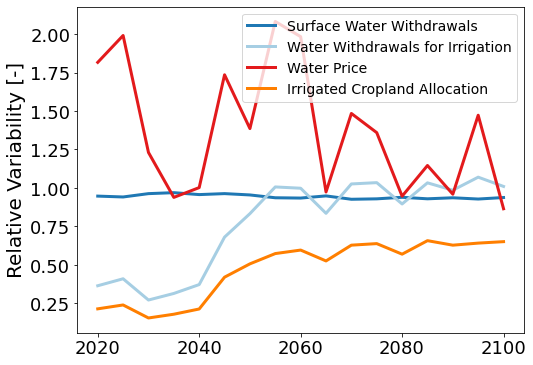

In [20]:
#plot CV ratios
fig,ax2 = plt.subplots(1,1,figsize=(8,6))
sns.lineplot(data=cv_indus_ratios,x='year',y='value_sw',color=cpal[1],lw=3,ax=ax2,label='Surface Water Withdrawals')
sns.lineplot(data=cv_indus_ratios,x='year',y='value_ww_irrig',color=cpal[0],lw=3,ax=ax2,label='Water Withdrawals for Irrigation')
sns.lineplot(data=cv_indus_ratios,x='year',y='value_wp',color=cpal[5],lw=3,ax=ax2,label='Water Price')
sns.lineplot(data=cv_indus_ratios,x='year',y='value_la_irrig',color=cpal[7],lw=3,ax=ax2,label='Irrigated Cropland Allocation')
ax2.set_xlabel('')
ax2.set_ylabel('Relative Variability [-]',fontsize=20)
#ax2.set_title('Indus')
ax2.legend([],[],frameon=False)
ax2.legend(loc='best',frameon=True,fontsize=14)
#plt.suptitle('Indus Basin')
plt.tick_params(axis='both', which='major', labelsize=18)
#ax2.legend(ncol=2,loc='lower center',fontsize=14,framealpha=1)
plt.show()

Figure 8B shows time series of runoff 2015-2100 for Indus basin, median, low runoff, and high runoff scenarios are highlighted

In [21]:
#begin by identifying which scenarios are the lowest, highest, and median

#lowest
print('Lowest Runoff in 2100')
display(mr_indus[mr_indus.year==2100].sort_values(by='value',ascending=True).iloc[0])
print('------------------------------')
#highest
print('Highest Runoff in 2100')
display(mr_indus[mr_indus.year==2100].sort_values(by='value',ascending=False).iloc[0])
print('------------------------------')
#median
print('Median Runoff in 2100')
display(mr_indus[mr_indus.year==2100].sort_values(by='value',ascending=False).iloc[49])

Lowest Runoff in 2100


scenario    stochastic_runoff_random_1
Units                             km^3
year                              2100
value                           176.03
basin                           IndusR
Name: 2199, dtype: object

------------------------------
Highest Runoff in 2100


scenario    stochastic_runoff_random_37
Units                              km^3
year                               2100
value                           221.063
basin                            IndusR
Name: 160423, dtype: object

------------------------------
Median Runoff in 2100


scenario    stochastic_runoff_random_52
Units                              km^3
year                               2100
value                           202.806
basin                            IndusR
Name: 247191, dtype: object

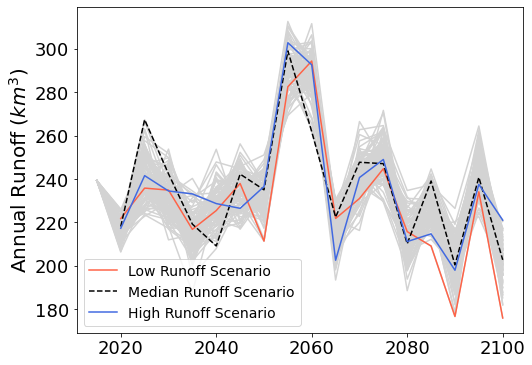

In [22]:
#plot
fig,axi = plt.subplots(1,1,figsize=(8,6))
years = mr_indus.year.unique()

sns.lineplot(data=mr_indus,x='year',y='value',color='lightgray',estimator=None,units='scenario')
sns.lineplot(data=mr_indus[(mr_indus.scenario=='stochastic_runoff_random_1') &
                          (mr_indus.year>=2020)],
            x='year',y='value',label='Low Runoff Scenario',color='tomato')
sns.lineplot(data=mr_indus[(mr_indus.scenario=='stochastic_runoff_random_52') &
                          (mr_indus.year>=2020)],
            x='year',y='value',label='Median Runoff Scenario',color='k',ls='--')
sns.lineplot(data=mr_indus[(mr_indus.scenario=='stochastic_runoff_random_37') &
                          (mr_indus.year>=2020)],
            x='year',y='value',label='High Runoff Scenario',color='royalblue')

axi.set_xlabel('')
axi.set_ylabel('Annual Runoff ($km^3$)',fontsize=20)
axi.legend([],[],frameon=False)
axi.legend(loc='lower left',frameon=True,fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

Figures 7C and 7D show maps of percent change in irrigated cropland in 2100 between the highest/lowest runoff scenarios and the median scenario

In [23]:
yr = 2100 #indicate which year we want to make these plots for

#load in CSV data of land allocation in these three scenarios (all basins)
fpath = '/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/land_alloc/'
la_worst = pd.read_csv(fpath+'land_alloc_1.csv')
la_best = pd.read_csv(fpath+'land_alloc_32.csv')
la_median = pd.read_csv(fpath+'land_alloc_49.csv')

#"clean up" data
la_crop = pd.concat([la_median,la_worst,la_best]) #merge the three scenarios
la_crop[['crop','basin','irr_type','fert_type']] = la_crop.landleaf.str.split('_',n=3,expand=True)
#select crops, year, and irrigated only
la_crop = la_crop[(la_crop.crop.isin(la_croplist)) & (la_crop.year==yr) & (la_crop.irr_type=='IRR')]
#sum across crops
la_crop_sum = la_crop.groupby(['Units','scenario','year','basin','irr_type'])['value'].sum().reset_index()

#calculate absolute difference between scenarios and median
la_crop_median = la_crop_sum[la_crop_sum.scenario=='stochastic_runoff_random_52']
la_crop_sum = la_crop_median.merge(la_crop_sum,on=['Units','year','basin','irr_type'],suffixes=['_median','_scenario'])
la_crop_sum['value_diff'] = la_crop_sum['value_scenario'] - la_crop_sum['value_median']
#calculate percent difference between scenarios and median
la_crop_sum['pct_diff'] = 100*((la_crop_sum['value_scenario'] - la_crop_sum['value_median'])/la_crop_sum['value_median'])

Make Figure 7C, difference between high runoff scenario and median

-44.97, -15.00 --> -15+
-15.00, -10.00 --> -15 to -10
-10.00,  -5.00 --> -10 to -5
 -5.00,   0.00 --> -5 to 0
  0.00,   5.00 --> 0 to 5
  5.00,  10.00 --> 5 to 10
 10.00,  15.00 --> 10 to 15
 15.00, 927.06 --> 15+


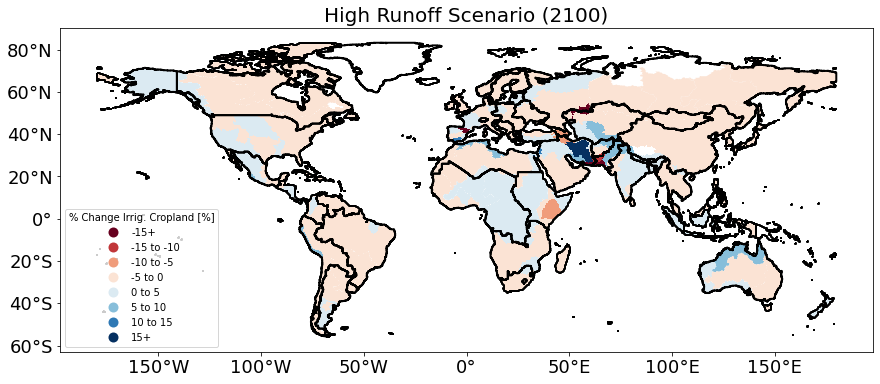

In [24]:
fig7c = la_crop_sum[(la_crop_sum.scenario_scenario=='stochastic_runoff_random_37')]
fig7c = gcam_basins.merge(fig7c,on=['basin'])

fig,(ax) = plt.subplots(1,1,figsize=(15,10))
divider = make_axes_locatable(ax)
fig7c.plot(column='pct_diff',ax=ax,cmap='RdBu',legend=True,scheme='user_defined',
             classification_kwds={'bins':[-15,-10,-5,0,5,10,15]},legend_kwds={'loc':'lower left','title':'Percent Difference'})
gcam_regions.boundary.plot(ax=ax,edgecolor='k',lw=2)

#make legend (https://stackoverflow.com/questions/74143732/customize-legend-labels-in-geopandas)
leg1 = ax.get_legend()
leg1.set_title('% Change Irrig. Cropland [%]')
new_legtxt = ['-15+','-15 to -10','-10 to -5','-5 to 0','0 to 5','5 to 10','10 to 15','15+'] 
for ix,eb in enumerate(leg1.get_texts()):
    print(eb.get_text(), "-->", new_legtxt[ix])
    eb.set_text(new_legtxt[ix])
    
#making latitude/longitude text labels smaller
#label maps with lat/lon coordinates
#https://gist.github.com/sebbacon/60ceec549f1d461af4543ccc5024c095?short_path=839cef5
axlbl = fig.axes[0]
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params()
cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])
cb_ax.tick_params(labelsize=18)

ax.set_title('High Runoff Scenario ('+str(yr)+')',fontsize=20)
plt.show()

Make Figure 7D, difference between low runoff scenario and median

  -inf, -15.00 --> -15+
-15.00, -10.00 --> -15 to -10
-10.00,  -5.00 --> -10 to -5
 -5.00,   0.00 --> -5 to 0
  0.00,   5.00 --> 0 to 5
  5.00,  10.00 --> 5 to 10
 10.00,  15.00 --> 10 to 15
 15.00,  66.86 --> 15+


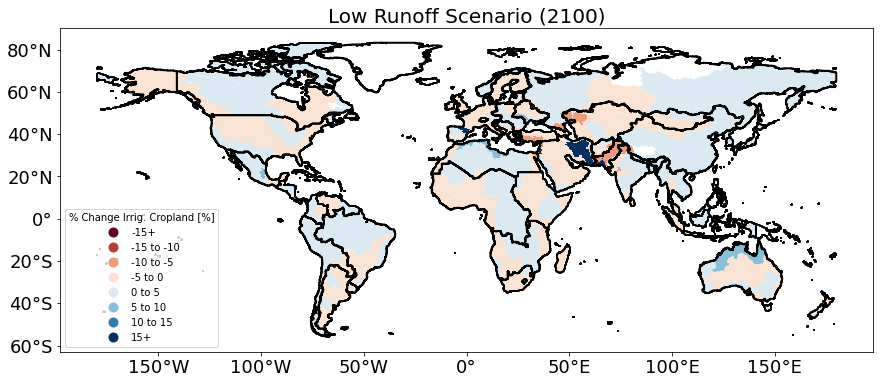

In [25]:
fig7d = la_crop_sum[(la_crop_sum.scenario_scenario=='stochastic_runoff_random_1')]
fig7d = gcam_basins.merge(fig7d,on=['basin'])
fig7d.loc[fig7d.pct_diff==-np.inf,'pct_diff'] = np.nan

fig,(ax) = plt.subplots(1,1,figsize=(15,10))
divider = make_axes_locatable(ax)
fig7d.plot(column='pct_diff',ax=ax,cmap='RdBu',legend=True,
                          scheme='user_defined',classification_kwds={'bins':[-15,-10,-5,0,5,10,15]},
            legend_kwds={'loc':'lower left'})
gcam_regions.boundary.plot(ax=ax,edgecolor='k',lw=2)

leg1 = ax.get_legend()
leg1.set_title('% Change Irrig. Cropland [%]')
new_legtxt = ['-15+','-15 to -10','-10 to -5','-5 to 0','0 to 5','5 to 10','10 to 15','15+'] 
for ix,eb in enumerate(leg1.get_texts()):
    print(eb.get_text(), "-->", new_legtxt[ix])
    eb.set_text(new_legtxt[ix])

#making latitude/longitude text labels smaller
#label maps with lat/lon coordinates
#https://gist.github.com/sebbacon/60ceec549f1d461af4543ccc5024c095?short_path=839cef5
axlbl = fig.axes[0]
ticksizes = axlbl.figure
cb_ax = ticksizes.axes[0]
cb_ax.tick_params()
cb_ax.set_xticks([-150,-100,-50,0,50,100,150])
cb_ax.set_yticks([-60,-40,-20,0,20,40,60,80])
cb_ax.set_xticklabels(['150°W','100°W','50°W','0°','50°E','100°E','150°E'])
cb_ax.set_yticklabels(['60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N'])
cb_ax.tick_params(labelsize=18)

ax.set_title('Low Runoff Scenario ('+str(yr)+')',fontsize=20)
plt.show()

# Supplementary Figures

# Figure S6

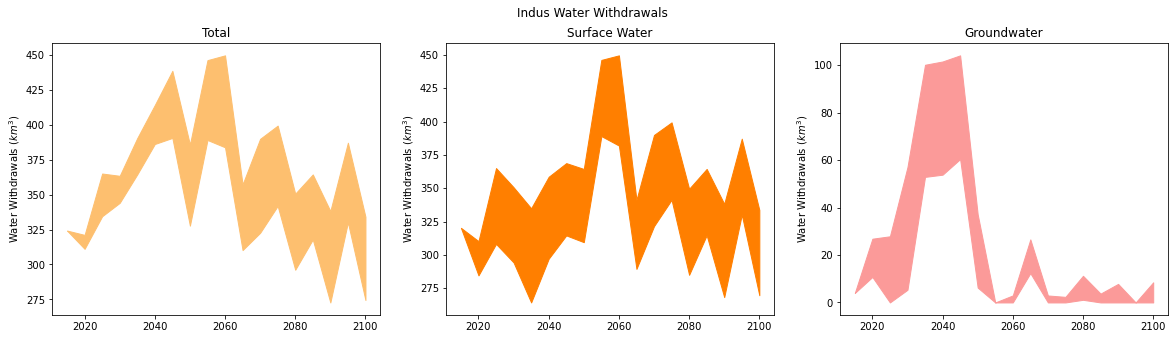

In [26]:
fig,(ax1,ax2,ax3)= plt.subplots(1,3,figsize=(20,5))

#total water withdrawals use in the indus
ww_indus_min = ww_indus.groupby(['year'])['value'].min().reset_index().sort_values(by='year',ascending=True)
ww_indus_max = ww_indus.groupby(['year'])['value'].max().reset_index().sort_values(by='year',ascending=True)
ww_indus_min = ww_indus_min['value'].to_numpy()
ww_indus_max = ww_indus_max['value'].to_numpy()

ax1.fill_between(years,ww_indus_min,ww_indus_max,color=cpal[6])
ax1.set_ylabel('Water Withdrawals ($km^3$)')
ax1.set_title('Total')

#surface water use in the indus
ww_sw_indus_min = ww_sw_indus.groupby(['year'])['value'].min().reset_index().sort_values(by='year',ascending=True)
ww_sw_indus_max = ww_sw_indus.groupby(['year'])['value'].max().reset_index().sort_values(by='year',ascending=True)
ww_sw_indus_min = ww_sw_indus_min['value'].to_numpy()
ww_sw_indus_max = ww_sw_indus_max['value'].to_numpy()

ax2.fill_between(years,ww_sw_indus_min,ww_sw_indus_max,color=cpal[7])
ax2.set_ylabel('Water Withdrawals ($km^3$)')
ax2.set_title('Surface Water')

#groundwater use in the indus
ww_gw_indus = ww_gw[(ww_gw.year>=2015) & (ww_gw.basin=='IndusR')] #surface water withdrawals
ww_gw_indus_min = ww_gw_indus.groupby(['year'])['value'].min().reset_index().sort_values(by='year',ascending=True)
ww_gw_indus_max = ww_gw_indus.groupby(['year'])['value'].max().reset_index().sort_values(by='year',ascending=True)
ww_gw_indus_min = ww_gw_indus_min['value'].to_numpy()
ww_gw_indus_max = ww_gw_indus_max['value'].to_numpy()

ax3.fill_between(years,ww_gw_indus_min,ww_gw_indus_max,color=cpal[4])
ax3.set_ylabel('Water Withdrawals ($km^3$)')
ax3.set_title('Groundwater')

plt.suptitle('Indus Water Withdrawals')
plt.show()

# Figure S7

In [27]:
#under low runoff scenario, which basins have the highest postive changes in irrigated cropland?
la_crop_sum[la_crop_sum.scenario_scenario=='stochastic_runoff_random_1'].sort_values(by='value_diff',ascending=False).head(5)

,Units,scenario_median,year,basin,irr_type,value_median,scenario_scenario,value_scenario,value_diff,pct_diff
288,thous km2,stochastic_runoff_random_52,2100,Iran,IRR,13.873557,stochastic_runoff_random_1,16.679587,2.806030,20.225743
36,thous km2,stochastic_runoff_random_52,2100,AmuDaryaR,IRR,30.752474,stochastic_runoff_random_1,32.238685,1.486211,4.832818
186,thous km2,stochastic_runoff_random_52,2100,EbroR,IRR,1.364342,stochastic_runoff_random_1,2.276494,0.912152,66.856582
216,thous km2,stochastic_runoff_random_52,2100,GangesR,IRR,166.249001,stochastic_runoff_random_1,166.976092,0.727091,0.437350
366,thous km2,stochastic_runoff_random_52,2100,MeditS,IRR,7.788895,stochastic_runoff_random_1,8.420091,0.631196,8.103794


We find that the Iran basin has the highest percent difference in land allocated to crops under the low runoff scenario compared to the median scenario.

In [28]:
#how much wheat does the Indus basin produce in 2100 under the median and low runoff scenarios?
ap_wheat_2100 = agprod[(agprod.year==2100) & (agprod.scenario.isin(['stochastic_runoff_random_1',
                                                                    'stochastic_runoff_random_52',
                                                                   'stochastic_runoff_random_37']))
                                              & (agprod.sector=='Wheat')]
ap_wheat_2100 = ap_wheat_2100.groupby(['scenario','Units','basin','sector','year'])['value'].sum().reset_index()
ap_wheat_2100 = ap_wheat_2100[ap_wheat_2100.basin=='IndusR']

ap_wheat_2100['scenario'] = ap_wheat_2100['scenario'].map({'stochastic_runoff_random_1':'Low Runoff Scenario',
                                                       'stochastic_runoff_random_37':'High Runoff Scenario',
                                                       'stochastic_runoff_random_52':'Median Runoff Scenario'})

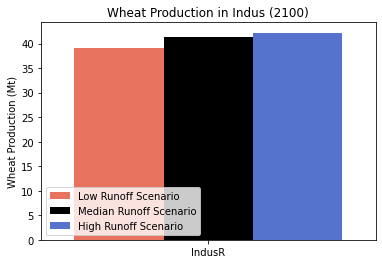

In [29]:
sns.barplot(data=ap_wheat_2100,x='basin',y='value',hue='scenario',
            hue_order=['Low Runoff Scenario','Median Runoff Scenario','High Runoff Scenario'],
           palette=['tomato','k','royalblue'])
plt.legend(title='Scenario')
plt.xlabel('')
plt.ylabel('Wheat Production (Mt)')
plt.legend(loc='lower left')
plt.title('Wheat Production in Indus (2100)')
plt.show()

Under the low runoff scenario compared to the median scenario, the Indus basin produces ~2.26 Mt less wheat 

In [30]:
#why does Iran grow more?
#calculate Iran's irrigated crop distribution in 2100
la_iran_2100 = la_crop[la_crop.basin=='Iran'].groupby(['Units','scenario','year','crop','basin','irr_type']).sum().reset_index()
la_iran_2100['scenario'] = la_iran_2100['scenario'].map({'stochastic_runoff_random_1':'Low Runoff Scenario',
                                                       'stochastic_runoff_random_37':'High Runoff Scenario',
                                                       'stochastic_runoff_random_52':'Median Runoff Scenario'})

la_indus_2100 = la_crop[la_crop.basin=='IndusR'].groupby(['Units','scenario','year','crop','basin','irr_type']).sum().reset_index()
la_indus_2100['scenario'] = la_indus_2100['scenario'].map({'stochastic_runoff_random_1':'Low Runoff Scenario',
                                                       'stochastic_runoff_random_37':'High Runoff Scenario',
                                                       'stochastic_runoff_random_52':'Median Runoff Scenario'})

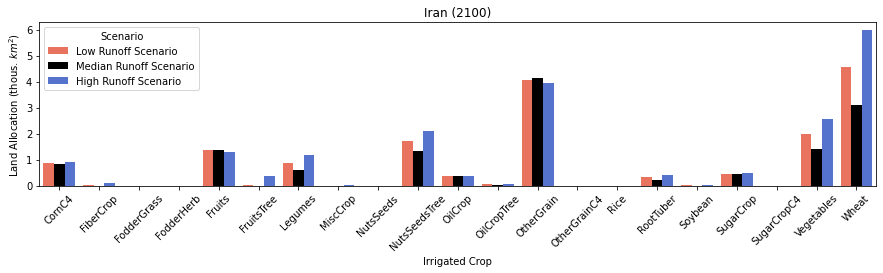

In [31]:
fig,ax = plt.subplots(1,1,figsize=(15,3))
bp = sns.barplot(data=la_iran_2100,x='crop',y='value',hue='scenario',
            hue_order=['Low Runoff Scenario','Median Runoff Scenario','High Runoff Scenario'],
           palette=['tomato','k','royalblue'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_xlabel('Irrigated Crop')
ax.set_ylabel('Land Allocation (thous. $km^2$)')
ax.legend(title='Scenario')
plt.title('Iran (2100)')
plt.show()

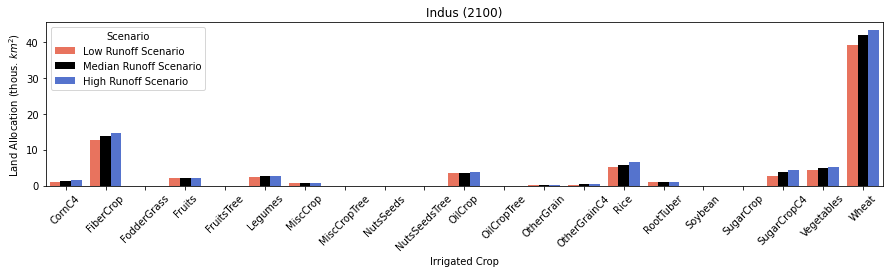

In [32]:
fig,ax = plt.subplots(1,1,figsize=(15,3))
bp = sns.barplot(data=la_indus_2100,x='crop',y='value',hue='scenario',
            hue_order=['Low Runoff Scenario','Median Runoff Scenario','High Runoff Scenario'],
           palette=['tomato','k','royalblue'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);
ax.set_xlabel('Irrigated Crop')
ax.set_ylabel('Land Allocation (thous. $km^2$)')
ax.legend(title='Scenario')
plt.title('Indus (2100)')
plt.show()

In [33]:
mr_indus_iran = mr[(mr.scenario.isin(['stochastic_runoff_random_1','stochastic_runoff_random_37',
                                                 'stochastic_runoff_random_52']))
            & (mr.basin.isin(['IndusR','Iran'])) & (mr.year==2100)]

mr_indus_iran['scenario'] = mr_indus_iran['scenario'].map({'stochastic_runoff_random_1':'Low Runoff Scenario',
                                                       'stochastic_runoff_random_37':'High Runoff Scenario',
                                                       'stochastic_runoff_random_52':'Median Runoff Scenario'})

/tmp/ipykernel_20648/766611907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mr_indus_iran['scenario'] = mr_indus_iran['scenario'].map({'stochastic_runoff_random_1':'Low Runoff Scenario',


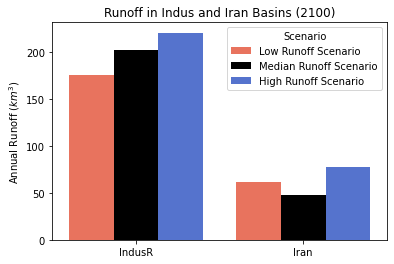

In [34]:
sns.barplot(data=mr_indus_iran,x='basin',y='value',hue='scenario',
            hue_order=['Low Runoff Scenario','Median Runoff Scenario','High Runoff Scenario'],
           palette=['tomato','k','royalblue'])
plt.legend(title='Scenario')
plt.xlabel('')
plt.ylabel('Annual Runoff ($km^3$)')
plt.title('Runoff in Indus and Iran Basins (2100)')
plt.show()

In [47]:
mr_indus_iran

,scenario,Units,year,value,basin
2199,Low Runoff Scenario,km^3,2100,176.0300,IndusR
2221,Low Runoff Scenario,km^3,2100,61.3555,Iran
160423,High Runoff Scenario,km^3,2100,221.0630,IndusR
160445,High Runoff Scenario,km^3,2100,77.4212,Iran
247191,Median Runoff Scenario,km^3,2100,202.8060,IndusR
247213,Median Runoff Scenario,km^3,2100,48.2904,Iran


In [51]:
#correlation between Iran and Indus basins
mr_test = mr[(mr.basin.isin(['IndusR','Iran'])) & (mr.year>=2020)]
#split IndusR/Iran into two columns
mr_test = mr_test.pivot_table('value',['scenario','Units','year'],'basin').reset_index()

ap_test = agprod[(agprod.year>=2020) & (agprod.basin.isin(['IndusR','Iran'])) & (agprod.sector=='Wheat')]
ap_test = ap_test.groupby(['scenario','Units','basin','sector','year'])['value'].sum().reset_index()
ap_test = ap_test.pivot_table('value',['scenario','Units','year','sector'],'basin').reset_index()

In [52]:
mr_rho = np.zeros(100)
ap_rho = np.zeros(100)

#for each scenario, calculate the correlation coefficient for 2020-2100
scen_list = mr_test.scenario.unique()[:]
for i in range(len(scen_list)):
    scen = scen_list[i]
    mr_test2 = mr_test[mr_test.scenario==scen].filter(['IndusR','Iran'])
    ap_test2 = ap_test[ap_test.scenario==scen].filter(['IndusR','Iran'])
    mr_rho[i] = mr_test2.corr().iloc[0,1]
    ap_rho[i] = ap_test2.corr().iloc[0,1]

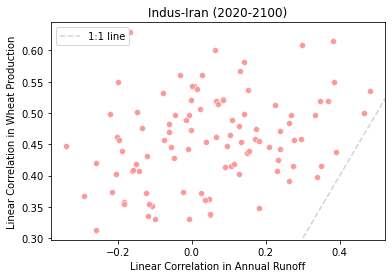

In [53]:
# sns.histplot(mr_rho,stat='probability',element='step',color=cpal[0])
# plt.xlabel('Pearson\'s Correlation Coefficient')
# plt.ylabel('Frequency')
# plt.title('Indus-Iran Annual Runoff (2020-2100)')
# plt.show()

# sns.histplot(ap_rho,stat='probability',element='step',color=cpal[7])
# plt.xlabel('Pearson\'s Correlation Coefficient')
# plt.ylabel('Frequency')
# plt.title('Indus-Iran Wheat Production (2020-2100)')
# plt.show()

fig,ax = plt.subplots(1,1)
sns.scatterplot(x=mr_rho,y=ap_rho,color=cpal[4],ax=ax)
xlims = ax.get_xlim()
ylims = ax.get_ylim()
sns.lineplot(x=np.linspace(np.min(mr_rho),np.max(ap_rho),100),
            y=np.linspace(np.min(mr_rho),np.max(ap_rho),100),
             ls='--',color='lightgray',label='1:1 line')
ax.set_xlim(xlims)
ax.set_ylim(ylims)
plt.xlabel('Linear Correlation in Annual Runoff')
plt.ylabel('Linear Correlation in Wheat Production')
plt.title('Indus-Iran (2020-2100)')
plt.show()

In [54]:
mr_test[(mr_test.year==2100) & (mr_test.scenario.isin(['stochastic_runoff_random_1',
                                                      'stochastic_runoff_random_37',
                                                      'stochastic_runoff_random_52']))]

basin,scenario,Units,year,IndusR,Iran
16,stochastic_runoff_random_1,km^3,2100,176.030,61.3555
543,stochastic_runoff_random_37,km^3,2100,221.063,77.4212
832,stochastic_runoff_random_52,km^3,2100,202.806,48.2904


Text(0.5, 1.0, 'Indus versus Iran Annual Runoff (2100)')

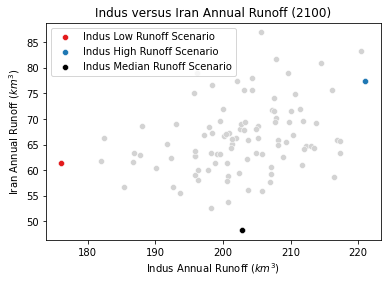

In [55]:
sns.scatterplot(data=mr_test[mr_test.year==2100],x='IndusR',y='Iran',color='lightgray')
sns.scatterplot(data=mr_test[(mr_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_1')],
                x='IndusR',y='Iran',color=cpal[5],label='Indus Low Runoff Scenario')
sns.scatterplot(data=mr_test[(ap_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_37')],
                x='IndusR',y='Iran',color=cpal[1],label='Indus High Runoff Scenario')
sns.scatterplot(data=mr_test[(mr_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_52')],
                x='IndusR',y='Iran',color='k',label='Indus Median Runoff Scenario')
plt.xlabel('Indus Annual Runoff ($km^3$)')
plt.ylabel('Iran Annual Runoff ($km^3$)')
plt.title('Indus versus Iran Annual Runoff (2100)')

Text(0.5, 1.0, 'Indus versus Iran Wheat Production (2100)')

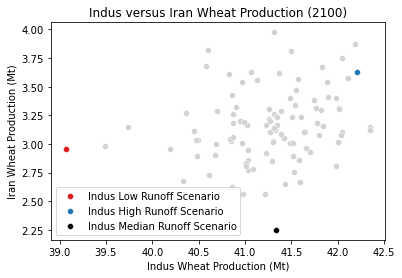

In [56]:
sns.scatterplot(data=ap_test[ap_test.year==2100],x='IndusR',y='Iran',color='lightgray')
sns.scatterplot(data=ap_test[(ap_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_1')],
                x='IndusR',y='Iran',color=cpal[5],label='Indus Low Runoff Scenario')
sns.scatterplot(data=ap_test[(ap_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_37')],
                x='IndusR',y='Iran',color=cpal[1],label='Indus High Runoff Scenario')
sns.scatterplot(data=ap_test[(ap_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_52')],
                x='IndusR',y='Iran',color='k',label='Indus Median Runoff Scenario')
plt.xlabel('Indus Wheat Production (Mt)')
plt.ylabel('Iran Wheat Production (Mt)')
plt.title('Indus versus Iran Wheat Production (2100)')

In [57]:
mr_test

basin,scenario,Units,year,IndusR,Iran
0,stochastic_runoff_random_1,km^3,2020,221.800,55.5393
1,stochastic_runoff_random_1,km^3,2025,235.820,56.3593
2,stochastic_runoff_random_1,km^3,2030,234.904,49.5316
3,stochastic_runoff_random_1,km^3,2035,216.821,47.0952
4,stochastic_runoff_random_1,km^3,2040,225.480,56.5853
...,...,...,...,...,...
1695,stochastic_runoff_random_99,km^3,2080,220.115,56.1790
1696,stochastic_runoff_random_99,km^3,2085,231.802,56.7261
1697,stochastic_runoff_random_99,km^3,2090,209.423,60.5662
1698,stochastic_runoff_random_99,km^3,2095,254.197,63.3611


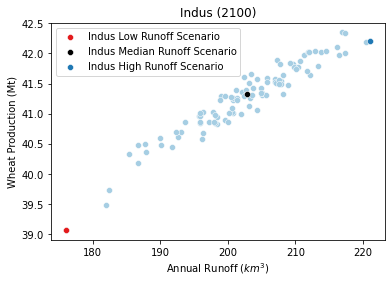

In [70]:
sns.scatterplot(x=mr_test[(mr_test.year==2100)]['IndusR'],y=ap_test[(ap_test.year==2100)]['IndusR'],color=cpal[0])
sns.scatterplot(x=mr_test[(mr_test.year==2100) & (mr_test.scenario=='stochastic_runoff_random_1')]['IndusR'],
               y=ap_test[(ap_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_1')]['IndusR'],color=cpal[5],label='Indus Low Runoff Scenario')
sns.scatterplot(x=mr_test[(mr_test.year==2100) & (mr_test.scenario.str.contains('_52'))]['IndusR'],
    y=ap_test[(ap_test.year==2100) & (ap_test.scenario.str.contains('_52'))]['IndusR'],
               color='k',label='Indus Median Runoff Scenario')
sns.scatterplot(x=mr_test[(mr_test.year==2100) & (mr_test.scenario.str.contains('_37'))]['IndusR'],
    y=ap_test[(ap_test.year==2100) & (ap_test.scenario.str.contains('_37'))]['IndusR'],
               color=cpal[1],label='Indus High Runoff Scenario')
plt.xlabel('Annual Runoff ($km^3$)')
plt.ylabel('Wheat Production (Mt)')
plt.title('Indus (2100)')
plt.show()

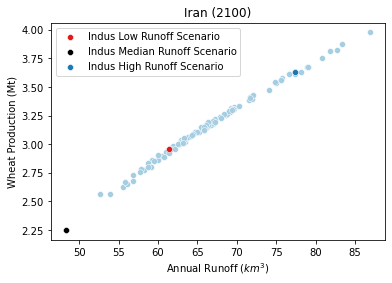

In [72]:
sns.scatterplot(x=mr_test[(mr_test.year==2100)]['Iran'],y=ap_test[(ap_test.year==2100)]['Iran'],color=cpal[0])
sns.scatterplot(x=mr_test[(mr_test.year==2100) & (mr_test.scenario=='stochastic_runoff_random_1')]['Iran'],
                y=ap_test[(ap_test.year==2100) & (ap_test.scenario=='stochastic_runoff_random_1')]['Iran'],
               color=cpal[5],label='Indus Low Runoff Scenario')
sns.scatterplot(x=mr_test[(mr_test.year==2100) & (mr_test.scenario.str.contains('_52'))]['Iran'],
                y=ap_test[(ap_test.year==2100) & (ap_test.scenario.str.contains('_52'))]['Iran'],
               color='k',label='Indus Median Runoff Scenario')
sns.scatterplot(x=mr_test[(mr_test.year==2100) & (mr_test.scenario.str.contains('_37'))]['Iran'],
    y=ap_test[(ap_test.year==2100) & (ap_test.scenario.str.contains('_37'))]['Iran'],
               color=cpal[1],label='Indus High Runoff Scenario')
plt.xlabel('Annual Runoff ($km^3$)')
plt.ylabel('Wheat Production (Mt)')
plt.title('Iran (2100)')
plt.show()

# Extra code used to produce pickles of data

In [42]:
# #load in CSV for water withdrawals (separated by sufrace water or groundwater)
# fpath = '/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/'
# queryName = 'water_withdrawals_source'
# ww = pd.read_csv(fpath+queryName+'.csv')  #read CSV
# #split up surface water and groundwater
# ww_gw = ww[ww.subresource.str.contains('groundwater')] #just groundwater
# ww_sw = ww[ww.subresource.str.contains('runoff')] #just surface water

# #filter to remove column for region (just care about basin) and to sum up different groundwater grades
# ww = ww.groupby(['scenario','Units','resource','year'])['value'].sum().reset_index()
# ww_gw = ww_gw.groupby(['scenario','Units','resource','year'])['value'].sum().reset_index()
# ww_sw = ww_sw.groupby(['scenario','Units','resource','year'])['value'].sum().reset_index()
# #these lines of code are used to clean up the basin name column (originally "resource") in the 3 dataframes
# ww[['basin','ww']] = ww['resource'].str.split('_water withdrawals',n=2,expand=True)
# ww = ww.drop(['ww','resource'],axis=1)
# ww_gw[['basin','ww']] = ww_gw['resource'].str.split('_water withdrawals',n=2,expand=True)
# ww_gw = ww_gw.drop(['ww','resource'],axis=1)
# ww_sw[['basin','ww']] = ww_sw['resource'].str.split('_water withdrawals',n=2,expand=True)
# ww_sw = ww_sw.drop(['ww','resource'],axis=1)
# #save the cleaned up data as pickles:
# ww.to_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww')
# ww_gw.to_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww_gw')
# ww_sw.to_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww_sw')

# #load in CSV for water withdrawals (separated by sufrace water or groundwater)
# fpath = '/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/'
# queryName = 'water_withdrawals_irrig'
# ww_irrig = pd.read_csv(fpath+queryName+'.csv')  #read CSV
# #filter to remove column for region (just care about basin)
# ww_irrig = ww_irrig.groupby(['scenario','Units','subsector','year'])['value'].sum().reset_index()
# #these lines of code are used to clean up the basin name column (originally "resource") in the 3 dataframes
# ww_irrig[['crop','basin']] = ww_irrig['subsector'].str.split('_',n=2,expand=True)
# #save the cleaned up data as pickles:
# ww_irrig.to_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/ww_irrig')

# #load in maximum available runoff query output
# fpath = '/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/'
# queryName = 'max_subresource'
# mr = pd.read_csv(fpath+queryName+'.csv') 
# mr = mr[mr.subresource=='runoff'] #limit to just runoff (as opposed to all resources from the query)
# mr = mr.groupby(['scenario','Units','resource','year'])['value'].sum().reset_index()
# #clean up name to show basin instead of "resource"
# mr[['basin','ww']] = mr['resource'].str.split('_water withdrawals',n=2,expand=True)
# mr = mr.drop(['resource','ww'],axis=1)
# mr.to_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/mr')

# #water price
# fpath = '/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/combined_csvs/'
# queryName = 'water_price'
# wp = pd.read_csv(fpath+queryName+'.csv') 
# #split up the name of the basin (take out _water withdrawals), make two columns basin and ww (ww is empty)
# wp[['basin','ww']] = wp['market'].str.split('_water withdrawals',n=2,expand=True)
# mktnames = wp.basin.unique() #list of market names
# bsnnames = [] #empty list to store basin names
# for mkt in mktnames: #loop through the markets
#     n = len(mkt) #length of string for market name
#     bsnnames.append(mkt[:int(n/2)]) #the basin name is half the length of the market name
# #make a dictionary for market names to basin names
# mkt_to_bsn = dict(zip(mktnames, bsnnames))
# #replace basin names to not be duplicated using the dictionary
# wp['basin'] = wp['basin'].map(mkt_to_bsn) #map the correct basin names
# #drop extra column
# wp = wp.drop(['ww'],axis=1)
# #save as pickle
# wp.to_pickle('/cluster/tufts/lamontagnelab/abirnb01/GCIMS/Abby_paper/queries/query_results/pickled_data/wp')